In [1]:
import tensorflow as ts
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from keras.datasets import cifar10

In [3]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [4]:
#check type of the train and test
type(xtrain)

numpy.ndarray

In [5]:
#check shape of the train and test
xtrain.shape #RGB

(50000, 32, 32, 3)

In [6]:
#look a first image in array
xtrain[10]#0 to 255

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

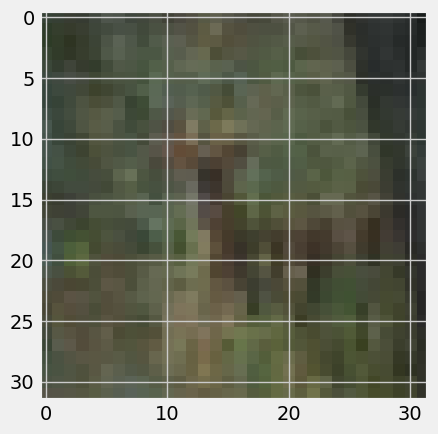

In [7]:
img0=plt.imshow(xtrain[10])

In [8]:
#get image label
lab1=ytrain[10]
print(lab1)

[4]


In [9]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
print('image class is:',classification[ytrain[10][0]])

image class is: deer


In [11]:
#change the label into set of numbers [10]
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [12]:
ytest_one_hot  #000100000 #000100000

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [13]:
print('one hot label:',ytrain_one_hot[10])

one hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [14]:
for x in xtrain:
    print('______')

______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______
______

In [15]:
#normalize the pixels values
xtrain=xtrain/255
xtest=xtest/255

In [16]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

C:\Users\arafath\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │         801,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457,324 (5.56 MB)

 Trainable params: 1,457,324 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=1,validation_split=0.2)

157/157 ━━━━━━━━━━━━━━━━━━━━ 157s 438ms/step - accuracy: 0.2392 - loss: 2.0129 - val_accuracy: 0.4532 - val_loss: 1.4973


In [20]:
model.evaluate(xtest,ytest_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4616 - loss: 1.4903


[1.4887295961380005, 0.4562000036239624]

In [21]:
cat=plt.imread('index.jpg')

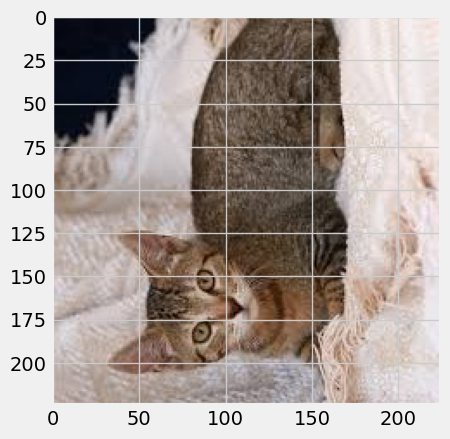

In [22]:
img=plt.imshow(cat)

In [23]:
#resize the image
#!pip install scikit-image
from skimage import transform

In [24]:
resize=transform.resize(cat,(32,32,3))

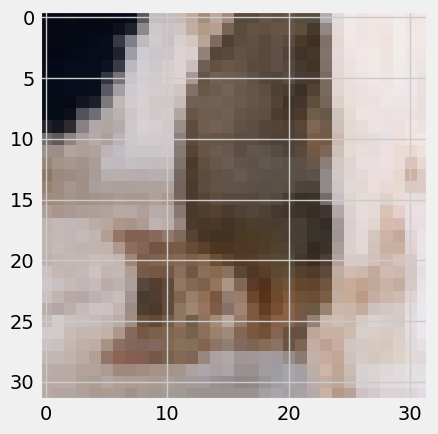

In [25]:
img=plt.imshow(resize)

In [27]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
[[0.01615456 0.00205342 0.13937439 0.2510493  0.09341482 0.3471062
  0.02555067 0.1140122  0.00610304 0.00518146]]


In [28]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[5, 3, 2, 7, 4, 6, 0, 8, 9, 1]


In [29]:
 for i in range(5):
        print(classification[list_index[i]])

dog
cat
bird
horse
deer


In [31]:
for i in range(10):
    for j in range(10):
        print(j)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
